# **1. Load the dataset into Python (use Pandas).**

In [132]:
import pandas as pd

# Download the CSV file from the URL
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/jabodetabek_house_price.csv"
df = pd.read_csv(url, sep=',')
pd.set_option('display.max_columns', None)
df.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,ads_id,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,hos11360272,4.0,4.0,239.0,272.0,0.0,shm - sertifikat hak milik,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,hos10680347,3.0,2.0,55.0,69.0,1.0,hgb - hak guna bangunan,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,hos10685867,3.0,3.0,119.0,131.0,1.0,hgb - hak guna bangunan,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,hos10927790,3.0,3.0,180.0,174.0,0.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,hos10785530,4.0,3.0,328.0,196.0,2.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


# **2. Inspect the dataset**

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

Dari df.info, terdapat 27 kolom yang berisi informasi detail mengenai suatu rumah berdasarkan url dari rumah123. Terdapat total 3553 rows pada dataset, namun ada beberapa kolom yang mengandung null sehingga perlu diisi seperti:

- property type: 3552 rows
- ads_id : 3549 rows
- bedrooms: 3519 rows
- bathrooms: 3524 rows
- land_size_m2: 3551 rows
- building_size_m2 : 3551 rows
- certificate : 3412 rows
- floors : 3547 rows
- building_age : 2108 rows
- year_built : 2108 rows
- property_condition : 3307 rows
- buidling_orientation : 1906 rows
- furnishing : 3166 rows

Dari 5 row yang ditampilkan, untuk data type terlihat aman, di mana kolom untuk menghitung jumlah kamar, luas tempat dll sudah dengan tipe data float, sedangkan kolom yang mendeskripsikan rumah seperti alamat, fasilitas dll dengan tipe object. Namun untuk kolom seperti facilities akan perlu dibinning dan kolom seperti certificate, properti condition, dan furnishing perlu di encode.

In [134]:
df.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000


Dari df.describe, ada beberapa data yang kurang masuk akal seperti untuk kolom bedroom dan bathrooms, max valuenya 99, di mana 1 rumah terdapat 99 kamar, dan land size dan building size juga kurang masuk akal di mana max value land_size sebuah rumah lebih luas dari lapangan sepak bola, namun data tersebut memungkinkan jika memang terdapat sebuah rumah dengan luas sebesar itu sehingga kamar mandi dan tidur berjumlah 99.

Selain itu pada kolom year_built, max value nya adalah 2052, data tersebut tidak masuk akal karena sekarang masih tahun 2025. Serta max value jumlah garasi sebanyak 50 juga kurang masuk akal. Namun hal ini perlu dicek kembali property_typenya, mungkin bukan rumah.

In [135]:
#Kolom Url di drop karena tidak berguna untuk analysis
df = df.drop('url', axis=1)
df.head()

,price_in_rp,title,address,district,city,lat,long,facilities,property_type,ads_id,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,hos11360272,4.0,4.0,239.0,272.0,0.0,shm - sertifikat hak milik,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,hos10680347,3.0,2.0,55.0,69.0,1.0,hgb - hak guna bangunan,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,hos10685867,3.0,3.0,119.0,131.0,1.0,hgb - hak guna bangunan,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,hos10927790,3.0,3.0,180.0,174.0,0.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,hos10785530,4.0,3.0,328.0,196.0,2.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


# **3. Handle missing values and binning**

In [136]:
# Calculate null values and percentage
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

# Create a DataFrame for columns with null values
null_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})

# Filter for columns with null values
null_df = null_df[null_df['Null Count'] > 0]

# Format the percentage with two decimal places and % symbol
null_df['Null Percentage'] = null_df['Null Percentage'].map('{:.2f}%'.format)

null_df

,Null Count,Null Percentage
property_type,1,0.03%
ads_id,4,0.11%
bedrooms,34,0.96%
bathrooms,29,0.82%
land_size_m2,2,0.06%
building_size_m2,2,0.06%
certificate,141,3.97%
floors,6,0.17%
building_age,1445,40.67%
year_built,1445,40.67%


In [137]:
# Display unique values for each column
# Untuk membantu memutuskan mengisi null
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'price_in_rp':
[2.99e+09 1.27e+09 1.95e+09 3.30e+09 4.50e+09 2.70e+09 2.35e+09 2.90e+09
 2.55e+09 9.52e+08 1.80e+09 2.50e+09 5.36e+09 2.25e+09 2.45e+09 1.25e+08
 1.98e+09 7.64e+08 2.00e+09 4.80e+08 1.90e+09 3.00e+08 5.27e+09 2.80e+09
 2.71e+09 5.00e+08 4.39e+08 8.00e+08 8.50e+08 7.00e+08 4.95e+09 1.30e+09
 1.20e+09 2.65e+09 4.25e+08 2.80e+08 9.99e+08 5.75e+09 1.50e+09 6.80e+09
 3.00e+09 1.68e+08 8.70e+08 4.95e+08 2.75e+08 1.44e+09 3.65e+08 3.50e+08
 3.51e+08 3.93e+08 3.92e+08 4.40e+08 4.01e+08 1.99e+09 1.15e+09 3.20e+09
 9.50e+08 1.25e+09 1.28e+09 8.95e+08 1.45e+09 6.90e+08 1.35e+09 1.00e+09
 2.85e+09 3.42e+08 3.27e+08 9.75e+08 1.37e+09 2.15e+09 1.55e+09 1.40e+09
 7.99e+08 7.79e+08 7.75e+08 1.75e+09 7.50e+08 4.30e+09 5.20e+08 6.85e+08
 9.30e+08 2.10e+09 2.17e+09 6.20e+08 1.60e+09 9.70e+08 5.75e+08 9.00e+08
 5.25e+08 5.10e+08 1.65e+09 4.20e+07 5.99e+08 1.68e+09 1.56e+09 1.18e+09
 9.90e+08 7.18e+08 1.39e+09 1.31e+09 6.80e+08 3.90e+08 4.55e+08 1.01e+09
 9.88e+08 4

In [138]:
# Rows dengan property_type null direplace dengan 'rumah'
# Karena semua row data adalah 'rumah'
df['property_type'] = df['property_type'].fillna('rumah')

In [139]:
# Kolom ads_id di drop saja, karena kurang berguna untuk analisis
df = df.drop(columns=['ads_id'])

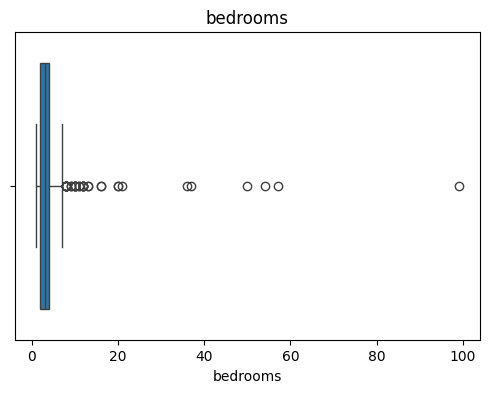

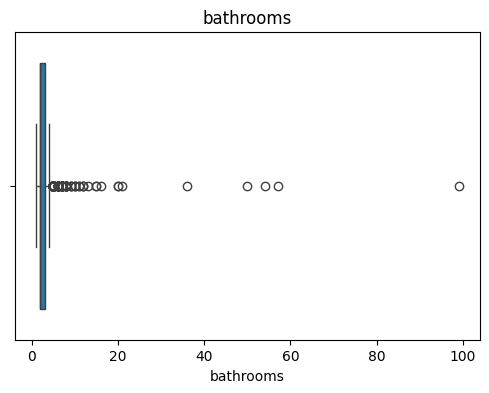

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for 'Bedrooms'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['bedrooms'])
plt.title('bedrooms')
plt.xlabel('bedrooms')
plt.show()

# Boxplot for 'Bathrooms'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['bathrooms'])
plt.title('bathrooms')
plt.xlabel('bathrooms')
plt.show()

Dari boxplot tersebut, terlihat ada beberapa rumah yang memiliki kamar lebih dari 25 (ada yang 99 kamar). Data tersebut termasuk outlier sehingga perlu di remove.

In [141]:
# Bedroom dan bathroom lebih dari 25 dihilangkan, (ambil hanya rumah dengan maks 25 kamar)
df = df[df['bedrooms'] <= 25]
df = df[df['bathrooms'] <= 25]

# Rows dengan bedrooms dan bathrooms null, direplace dengan mengambil nilai mode, karena rumah tidak mungkin memiliki 0 kamar
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])


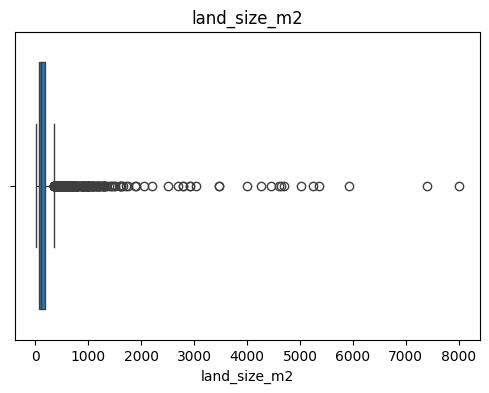

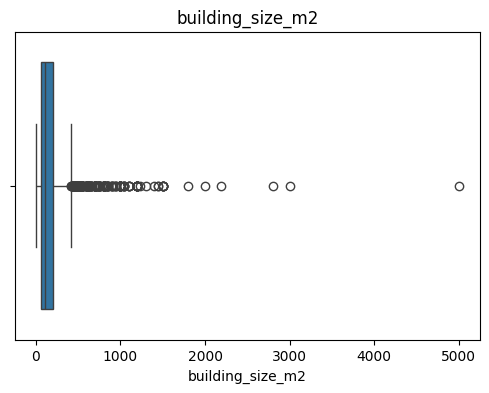

In [142]:
# Boxplot for 'Land Size'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['land_size_m2'])
plt.title('land_size_m2')
plt.xlabel('land_size_m2')
plt.show()

# Boxplot for 'Building Size'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['building_size_m2'])
plt.title('building_size_m2')
plt.xlabel('building_size_m2')
plt.show()

Dari boxplot tersebut, terlihat ada data landsize hingga 8000 dabn building size hingga 6000. Hal ini termasuk outlier. Karena itu akan dibatasi untuk landsize sampai 2000, sedangkan building size sampai 1500 dengan remove rownya. Jumlah row juga tergolong sedikit jadi aman untuk diremove

In [143]:
# Count rows with land_size_m2 > 2000 and building_size_m2 > 1500
outlier_land_size = df[df['land_size_m2'] > 2000].shape[0]
outlier_building_size = df[df['building_size_m2'] > 1500].shape[0]

print(f"Number of rows with land_size_m2 > 2000: {outlier_land_size}")
print(f"Number of rows with building_size_m2 > 1500: {outlier_building_size}")

Number of rows with land_size_m2 > 2000: 23
Number of rows with building_size_m2 > 1500: 6


In [144]:
# Rows dengan land_size_m2 > 2000 and building_size_m2 > 1500 diremove
# Count rows with land_size_m2 > 2000 and building_size_m2 > 1500
df = df[df['land_size_m2'] <= 2000]
df = df[df['building_size_m2'] <= 1500]

# Rows dengan land_size dan building_size yang null di drop saja karena hanya 2 rows dari 3553 rows (tidak pengaruh banyak)
df = df.dropna(subset=['land_size_m2'])
df = df.dropna(subset=['building_size_m2'])

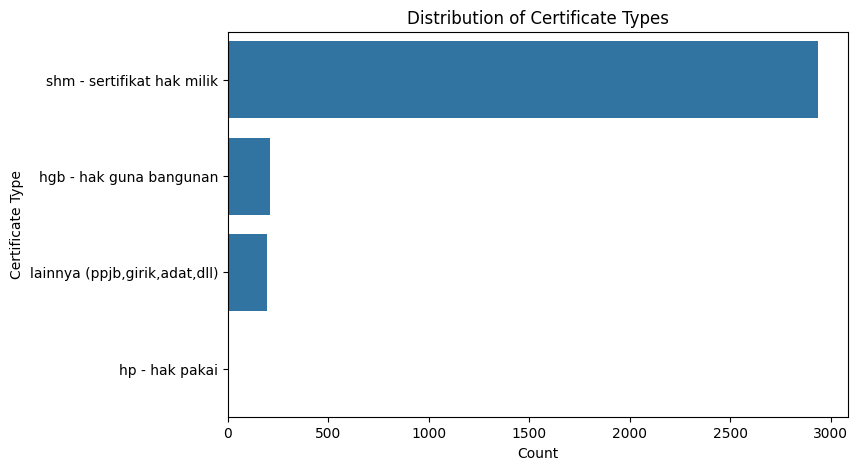

In [145]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='certificate', order=df['certificate'].value_counts().index)
plt.title('Distribution of Certificate Types')
plt.xlabel('Count')
plt.ylabel('Certificate Type')
plt.show()

Dari boxplot tersebut, sebagian besar data certificate adalah shm. Namun agar tidak menimbulkan bias, kita mengisi null values dengan unknown.

In [146]:
# Count rows with 'hp - hak pakai' certificate
hp_hak_pakai_count = df[df['certificate'] == 'hp - hak pakai'].shape[0]
print(f"Number of rows with 'hp - hak pakai' certificate: {hp_hak_pakai_count}")

Number of rows with 'hp - hak pakai' certificate: 1


In [147]:
# Rows dengan certificate null di replace dengan unknown
df['certificate'] = df['certificate'].fillna('unknown')

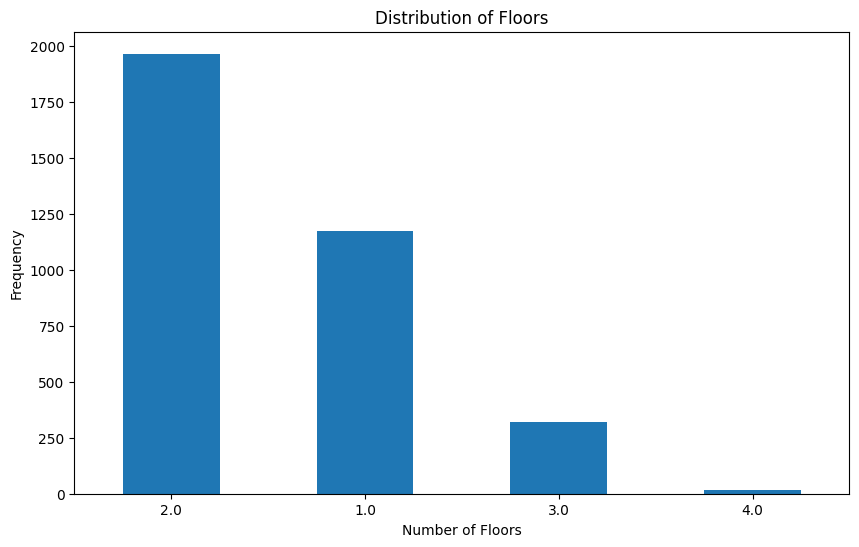

In [148]:
plt.figure(figsize=(10, 6))
df['floors'].value_counts().plot(kind='bar', rot=0)
plt.title('Distribution of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Frequency')
plt.show()

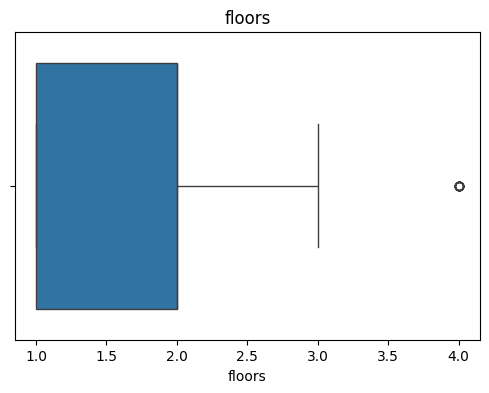

In [149]:
# Boxplot for 'Floors'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['floors'])
plt.title('floors')
plt.xlabel('floors')
plt.show()

In [150]:
count_4_floors = df[df['floors'].isin([4, 5])].shape[0]
print(f"Number of rows with 4 floors: {count_4_floors}")

Number of rows with 4 floors: 15


Dari barchart tersebut, terlihat bahwa sebagian besar rumah memiliki 2 lantai diikuti oleh 1 lantai, dan ada yang 3. Namun adapun rumah yang punya 4 lantai dan menjadi outlier. Jumlah datanya sedikit (yaitu 15 row data) sehingga bisa di remove saja.

In [151]:
# Floors lebih dari 4 dihilangkan
df = df[df['floors'] < 4]

# Rows dengan floors null , direplace dengan mengambil nilai mode, karena rumah tidak mungkin memiliki 0 lantai
df['floors'] = df['floors'].fillna(df['floors'].mode()[0])

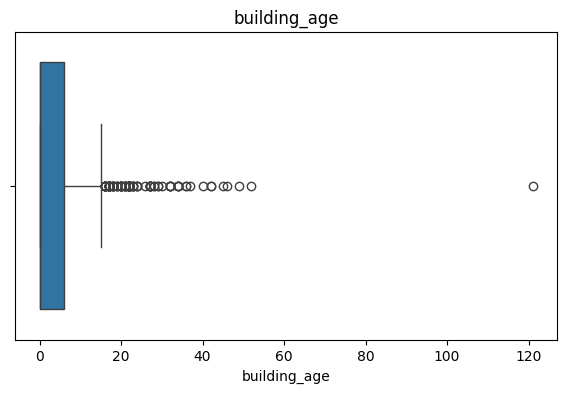

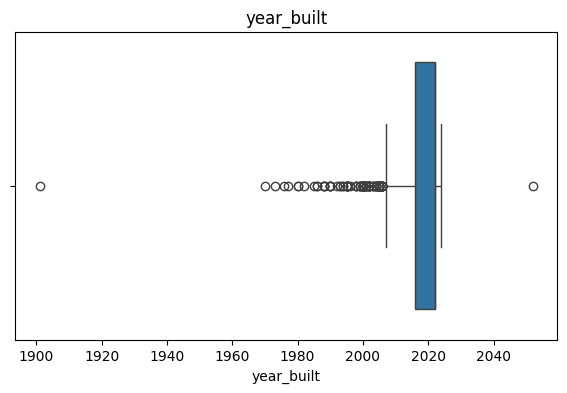

In [152]:
# Boxplot for 'Land Size'
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['building_age'])
plt.title('building_age')
plt.xlabel('building_age')
plt.show()

# Boxplot for 'Building Size'
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['year_built'])
plt.title('year_built')
plt.xlabel('year_built')
plt.show()

In [153]:
count_year_built_less_than_1990 = df[df['year_built'] < 1990].shape[0]
print(f"Number of rows with year_built less than 1990: {count_year_built_less_than_1990}")

count_building_age_more_than_30 = df[df['building_age'] > 30].shape[0]
print(f"Number of rows with building_age more than 30: {count_building_age_more_than_30}")

Number of rows with year_built less than 1990: 15
Number of rows with building_age more than 30: 19


Dari boxplot tersebut, terlihat bahwa di kolom building age terdapat outlier yaitu 120 tahun, dan juga beberapa data yang lebih dari 30 tahun. Serta pada kolom year build, ada data yang lebih dari tahun 2050 (tidak masuk akal) dan beberapa data yang tahun bangunnya kurang dari 1990 (kurang relevan). Jumlah data dari kedua kolom tersebut sedikit sehingga bisa diremove. Selanjutnya sebaiknya dibinning untuk tahun untuk mempermudah analisis

In [154]:
# Filter invalid data first
df = df[(df['year_built'] >= 1990) & (df['year_built'] <= 2025)]
df = df[(df['building_age'] >= 0) & (df['building_age'] <= 30)]

# BINNING building_age
bins_age = [-1, 0, 5, 10, 20, 30, float("inf")]
labels_age = [
    "0 tahun (baru)",
    "1-5 tahun",
    "6-10 tahun",
    "11-20 tahun",
    "21-30 tahun",
    "unknown"
]
df['building_age'] = pd.cut(df['building_age'], bins=bins_age, labels=labels_age, include_lowest=True)

# BINNING year_built
bins_year = [1989, 1999, 2009, 2015, 2020, 2025]
labels_year = [
    "1990-1999",
    "2000-2009",
    "2010-2015",
    "2016-2020",
    "2021+"
]
df['year_built'] = pd.cut(df['year_built'], bins=bins_year, labels=labels_year, include_lowest=True)

# Check the result
print(df[['building_age', 'year_built']].head())


   building_age year_built
0     1-5 tahun  2016-2020
3    6-10 tahun  2016-2020
4    6-10 tahun  2010-2015
5    6-10 tahun  2010-2015
12   6-10 tahun  2010-2015


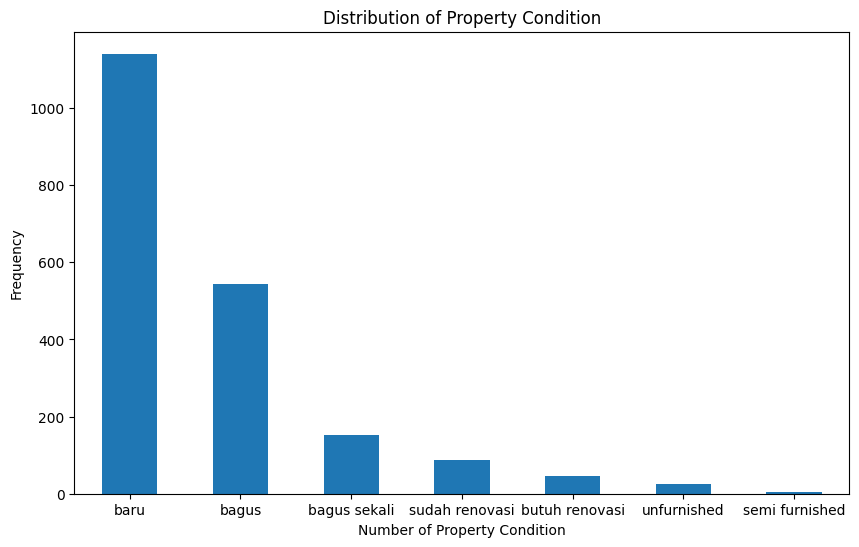

In [155]:
plt.figure(figsize=(10, 6))
df['property_condition'].value_counts().plot(kind='bar', rot=0)
plt.title('Distribution of Property Condition')
plt.xlabel('Number of Property Condition')
plt.ylabel('Frequency')
plt.show()

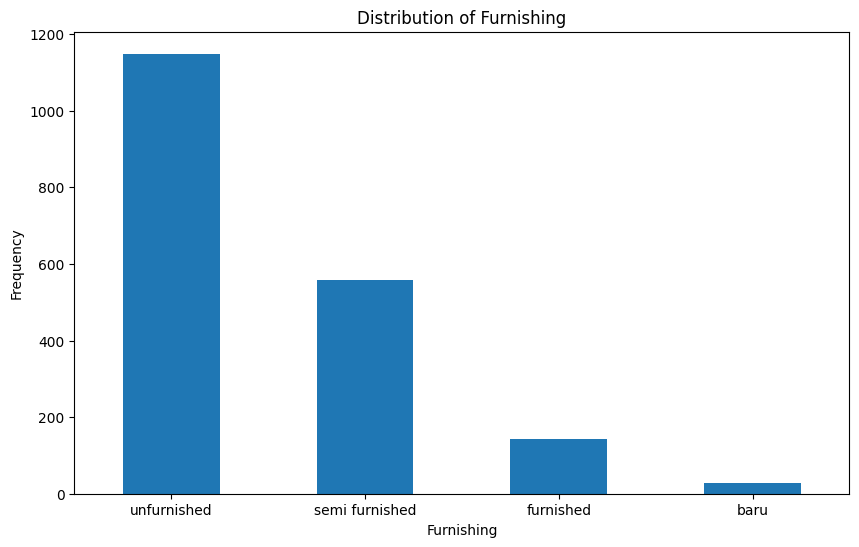

In [156]:
plt.figure(figsize=(10, 6))
df['furnishing'].value_counts().plot(kind='bar', rot=0)
plt.title('Distribution of Furnishing')
plt.xlabel('Furnishing')
plt.ylabel('Frequency')
plt.show()

Terlihat di kolom property condition dan furnishing ada data yang sama seperti unfurnished, semifurnished dan baru, sehingga datanya perlu dipindah, di mana "baru" masuk ke dalam kolom property condition dan "unfurnished" dan "semi furnished" masuk ke kolom furnishing.

In [157]:
import numpy as np

# 1. Kalau furnishing == "baru" → pindahkan ke property_condition
mask = df["furnishing"].str.lower().eq("baru")
df.loc[mask, "property_condition"] = "baru"
df.loc[mask, "furnishing"] = np.nan

# 2. Kalau property_condition salah isi ("semi furnished" / "unfurnished")
mask = df["property_condition"].str.lower().isin(["semi furnished", "unfurnished"])
df.loc[mask, "furnishing"] = df.loc[mask, "property_condition"]
df.loc[mask, "property_condition"] = np.nan

# 3. Normalisasi teks (biar rapi)
df["furnishing"] = df["furnishing"].str.strip().str.lower()
df["property_condition"] = df["property_condition"].str.strip().str.lower()

In [158]:
#Rows yang null pada kolom property_condition diisi dengan mode, karena null percentage masih tergolong kecil (6.92%)
mode_val = df["property_condition"].mode()[0]
df["property_condition"] = df["property_condition"].fillna(mode_val)

In [159]:
#Rows yang null pada kolom furnishing diisi dengan unknown , karena null percentage lebih dari 10% (cukup besar) supaya tidak menimbulkan bias
df["furnishing"] = df["furnishing"].fillna("unknown")

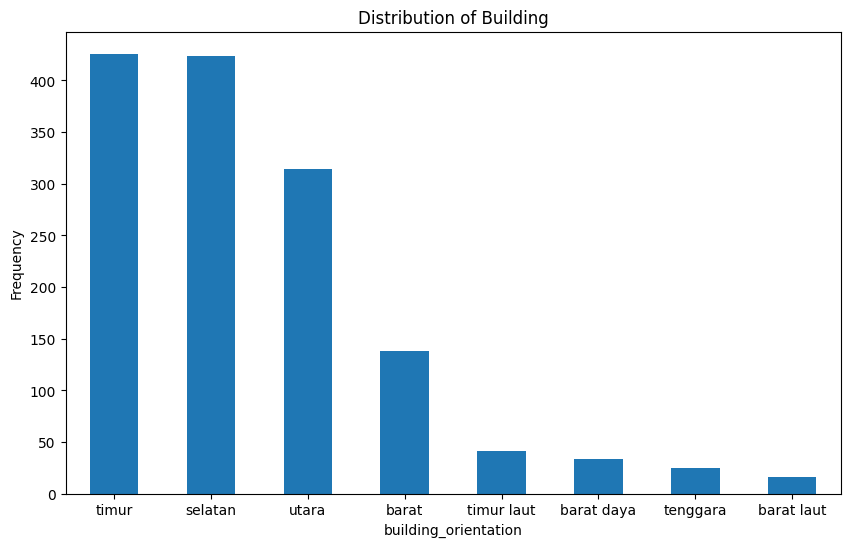

In [160]:
plt.figure(figsize=(10, 6))
df['building_orientation'].value_counts().plot(kind='bar', rot=0)
plt.title('Distribution of Building')
plt.xlabel('building_orientation')
plt.ylabel('Frequency')
plt.show()

Dari bar chart tersebut, terlihat building orientation tiap rumah sangat bervariasi dan tidak bisa kita isi langsung dengan mode karena null percentage tinggi (>40%) sehingga sebaiknya diisi dengan unknown.

In [161]:
# Null values pada building orientaion diisi dengan unknown
df['building_orientation'] = df['building_orientation'].fillna('unknown')


In [162]:
# Untuk facilities, supaya analisis lebih akurat, kita hapus duplikat, membetulkan huruf besar kecil, dan map kembali kata" yang artinya sama
import pandas as pd
import re

# Fungsi pembersihan facilities
def clean_facilities_str(facilities):
    if pd.isna(facilities):
        return ""

    items = facilities.split(",")
    cleaned = set()

    mapping = {
        "AC": ["AC"],
        "CARPORT": ["CARPORT"],
        "BACKYARD": ["BACKYARD"],
        "CCTV": ["CCTV"],
        "KITCHEN SET": ["DAPUR", "KITCHEN"],
        "TAMAN": ["GARDEN", "TAMAN"],
        "TRACK LARI": ["TRACK LARI", "JOGGING TRACK"],
        "KOLAM RENANG": ["KOLAM RENANG", "POOL", "PRIVATE POOL", "KOLAM RENANG ANAK"],
        "KOMPOR": ["KOMPOR"],
        "LAPANGAN OLAHRAGA": ["LAPANGAN"],
        "MUSHOLA": ["MUSHOLA", "MUSHOLLA"],
        "ONE GATE SYSTEM": ["ONE GATE", "ONEGATE"],
        "KEAMANAN": ["KEAMANAN", "SECURITY"],
        "SMART HOME": ["SMARTHOME"],
        "SERVICE AREA": ["SERVIS", "TORN", "TOREN", "TORRENT"],
        "PEMANAS AIR": ["WATER HEATER"],
        "TEMPAT LAUNDRY": ["TEMPAT JEMURAN"]
    }

    for item in items:
        item = re.sub(r"\s+", " ", item.strip()).upper()
        if item == "" or item in ["WASTAFEL", "POMPA", "POSISI HOEK"]:
            continue

        mapped = False
        for key, keywords in mapping.items():
            if any(keyword in item for keyword in keywords):
                cleaned.add(key)
                mapped = True
                break

        if not mapped:
            cleaned.add(item)

    # Kembalikan sebagai string tunggal, pisahkan koma
    return ", ".join(sorted(cleaned))

# Terapkan langsung ke kolom asli
df["facilities"] = df["facilities"].apply(clean_facilities_str)

# Cek hasil
print(df["facilities"].head())

0                  JALUR TELEPON, TAMAN, TEMPAT LAUNDRY
3     AC, CCTV, JALUR TELEPON, KEAMANAN, KOLAM RENAN...
4      AC, JALUR TELEPON, KEAMANAN, KOLAM RENANG, TAMAN
5          JALUR TELEPON, KEAMANAN, KOLAM RENANG, TAMAN
12    AC, CCTV, JALUR TELEPON, KEAMANAN, KOLAM RENAN...
Name: facilities, dtype: object


# **4. Exploratory Data Analysis**

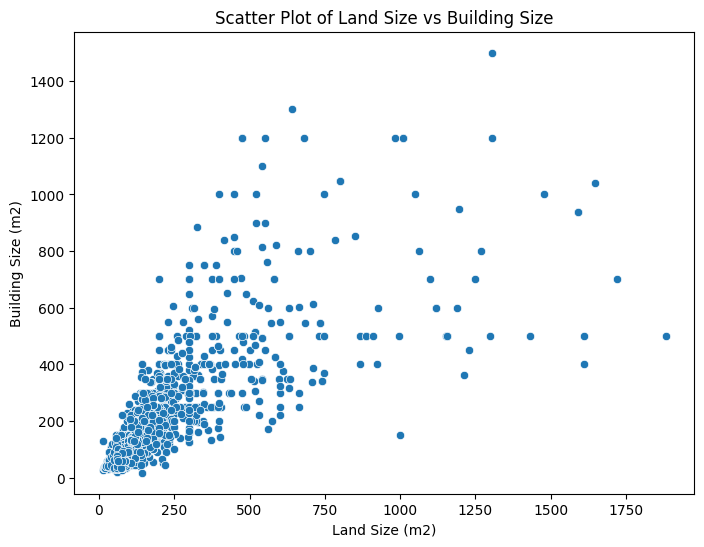

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='land_size_m2', y='building_size_m2', data=df)
plt.title('Scatter Plot of Land Size vs Building Size')
plt.xlabel('Land Size (m2)')

plt.ylabel('Building Size (m2)')
plt.show()

Dari scatter plot tersebut, bisa dikatakan bahwa ada relasi yang kuat (strong correlation) antara land size dengan building size, semakin besar landsize, semakin besar building size juga. Namun korelasinya tidak sempurna. Ada beberapa rumah yang tanahnya sangat besar(misalnya, 3.000 m² atau 3.500 m²), tapi bangunannya tidak terlalu besar.

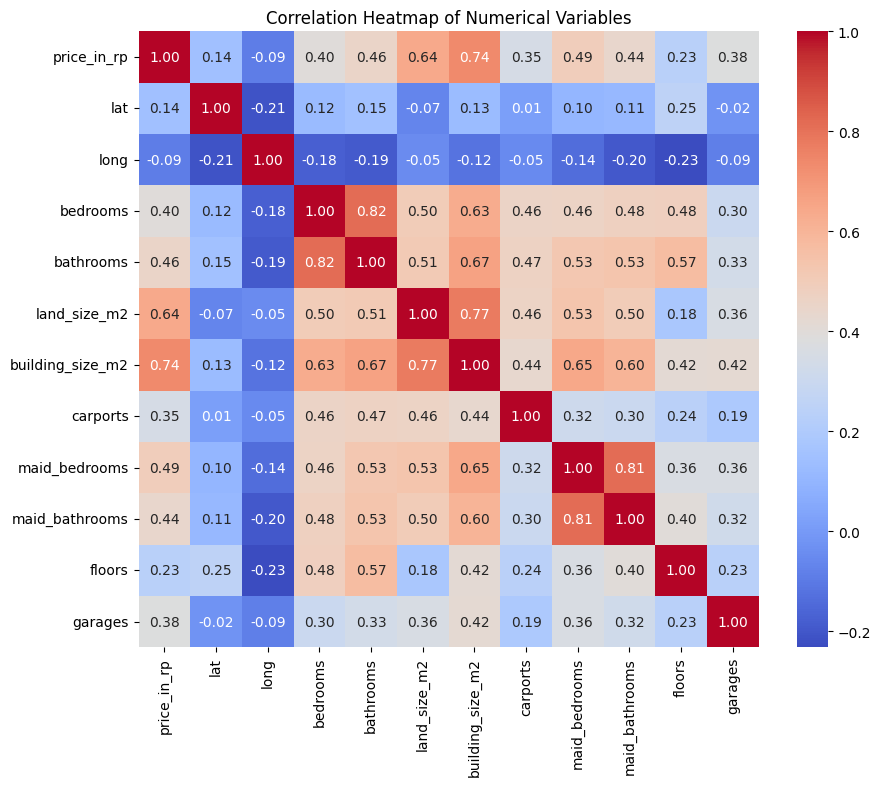

In [164]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Dari heatmap terlihat bahwa building_size_m2 (0,74) dan land_size_m2 (0,64) memiliki korelasi positif paling kuat dengan price_in_rp, yang berarti semakin besar bangunan dan luas tanah maka harga properti cenderung semakin tinggi.

Jumlah kamar tidur dan kamar mandi keduanya memiliki korelasi sedang dengan harga (~0,4–0,46) dan korelasi yang kuat satu sama lain (0,82), sehingga rumah yang lebih besar biasanya memiliki lebih banyak kamar tidur maupun kamar mandi.

Latitude/longitude hanya menunjukkan korelasi yang lemah, sehingga harga lebih dipengaruhi oleh ukuran dan fitur properti dibandingkan dengan koordinat lokasi sederhana.

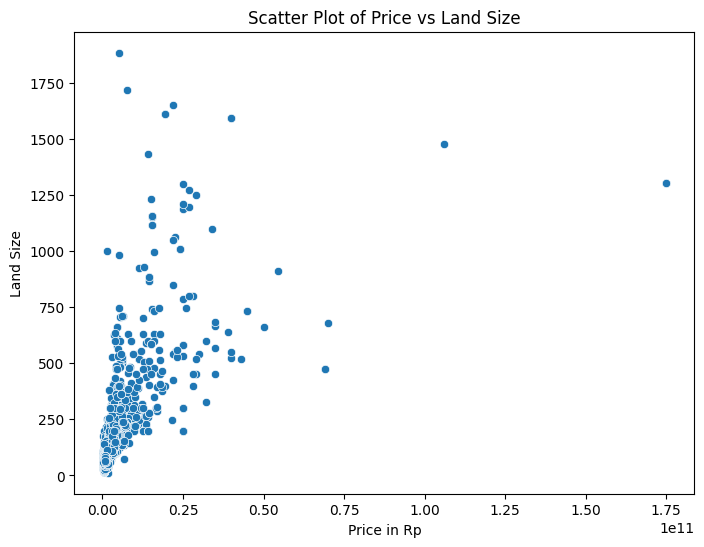

In [165]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price_in_rp', y='land_size_m2', data=df)
plt.title('Scatter Plot of Price vs Land Size')
plt.xlabel('Price in Rp')
plt.ylabel('Land Size')
plt.show()

Dari scatter plot tersebut, bisa dikatakan bahwa ada relasi yang kuat (strong correlation) antara price dengan kand size, semakin besar landsize, semakin tinggi harga rumah juga.

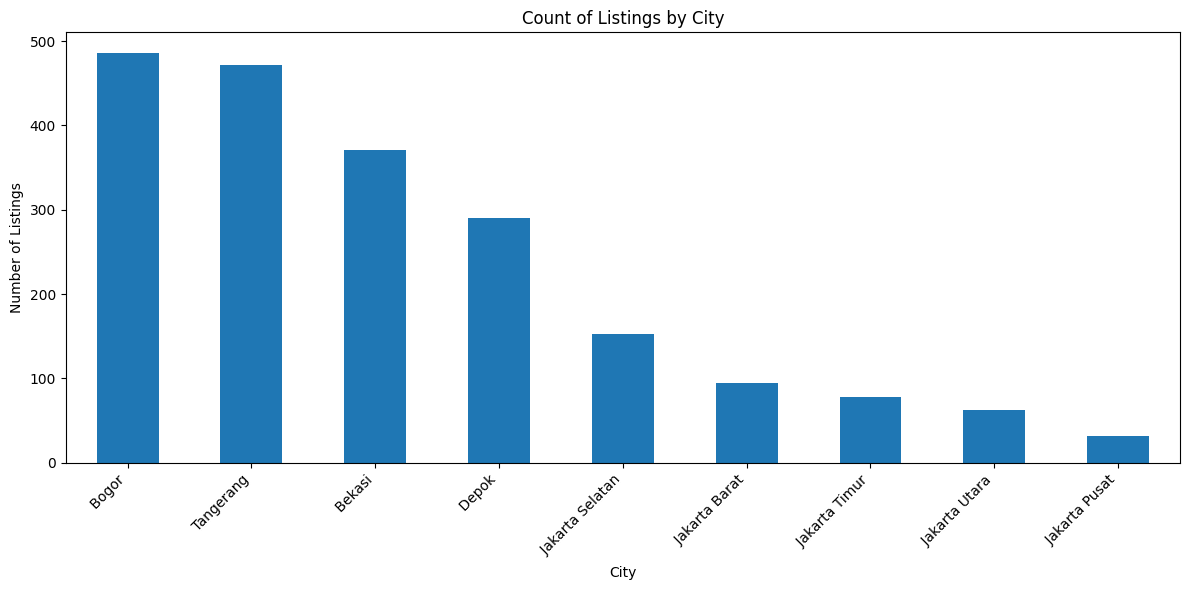

In [166]:
plt.figure(figsize=(12, 6))
df['city'].value_counts().plot(kind='bar')
plt.title('Count of Listings by City')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Dari bar chart tersebut, bisa disimpulkan bahwa kota Bogor memiliki jumlah listing rumah terbanyak dari dataset tersebut diikuti dengan Tangerang dan Bekasi dan Jakarta Pusat memiliki jumlah listing rumah paling sedikit.

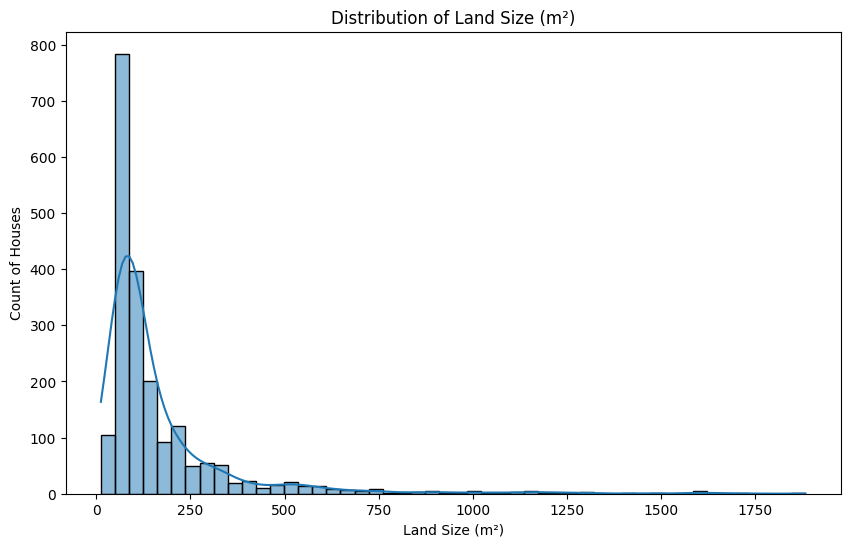

In [167]:
plt.figure(figsize=(10, 6))
sns.histplot(df['land_size_m2'], bins=50, kde=True)
plt.title('Distribution of Land Size (m²)')
plt.xlabel('Land Size (m²)')
plt.ylabel('Count of Houses')
plt.show()

Dari histogram tersebut, distribusi land size menunjukkan right-skewed. Mayoritas rumah memiliki luas lahan kecil, sekitar di bawah 200 m², sesuai kondisi umum di kota-kota Indonesia. Sedikit sekali rumah dengan lahan sangat luas—ini membentuk ekor panjang ke kanan, biasanya rumah mewah atau di daerah pinggiran/pedesaan.